## Importing the dependences

In [1]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt , seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score

## Data collection & preprocessing

In [2]:
# loading the data by using pandas library
ad = pd.read_csv('advertising.csv')

In [3]:
# the first 5 rows in the data 
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# finding the missing values
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# information about the data 
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# the number of rows and columns of the data
ad.shape

(200, 4)

In [7]:
# the statistical measures of the data
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Analyzation 

In [8]:
sns.set()

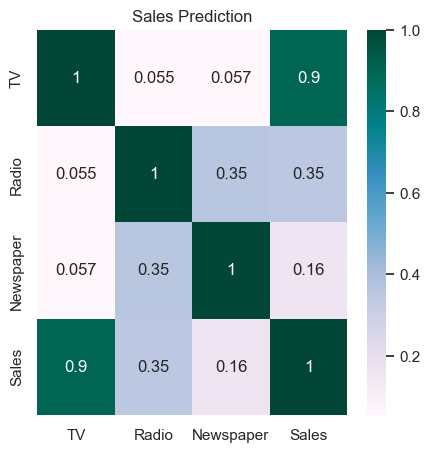

In [9]:
# heat map to find the correlation between the diffrent values
plt.figure(figsize=(5,5))
sns.heatmap(ad.corr(), annot=True, cmap='PuBuGn', cbar=True)
plt.title('Sales Prediction')
plt.show()

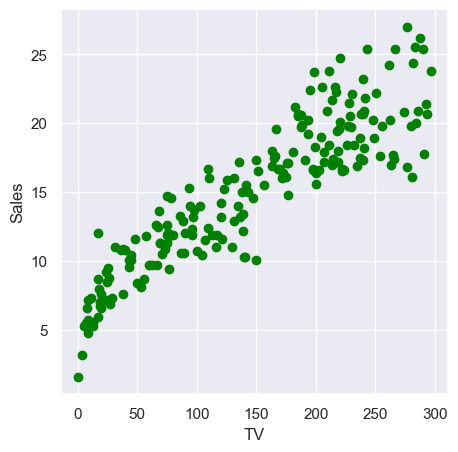

In [10]:
# scatter plot between TV and sales
TV = ad['TV']
Sales = ad['Sales']
plt.figure(figsize=(5,5))
plt.scatter(TV,Sales, color='green', marker='o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show() 

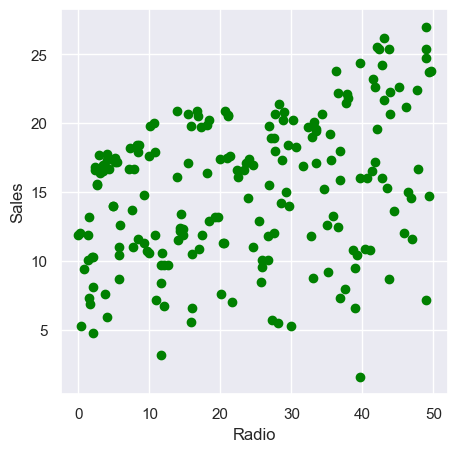

In [11]:
# scatter plot between Radio and sales
Radio = ad['Radio']
Sales = ad['Sales']
plt.figure(figsize=(5,5))
plt.scatter(Radio,Sales, color='green', marker='o')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

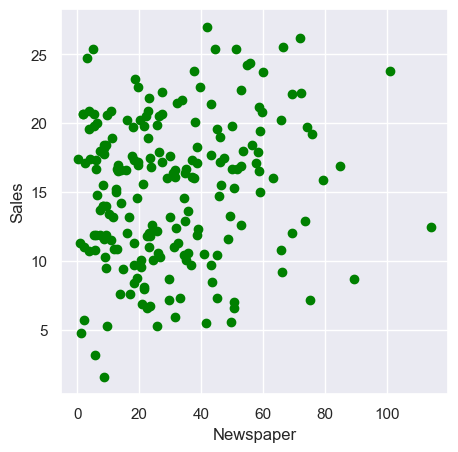

In [12]:
# scatter plot between Newspaper and sales
Newspaper = ad['Newspaper']
Sales = ad['Sales']
plt.figure(figsize=(5,5))
plt.scatter(Newspaper,Sales, color='green', marker='o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

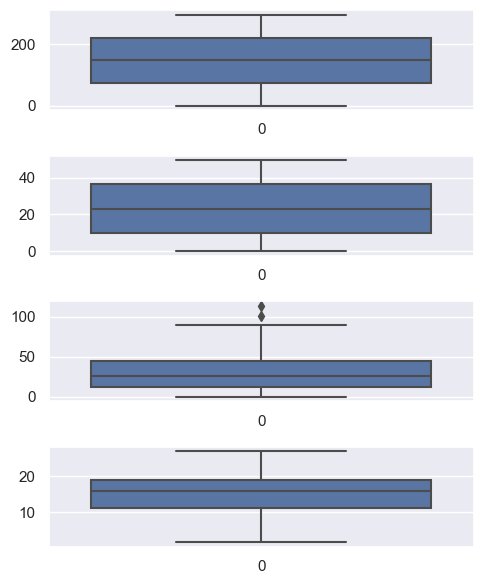

In [13]:
# cheking if there exist an Outliers
fig, axs = plt.subplots(4, figsize = (5,6))
TV = ad['TV']
Radio = ad['Radio']
Newspaper = ad['Newspaper']
Sales = ad['Sales']
plt1 = sns.boxplot(TV, ax = axs[0])
plt3 = sns.boxplot(Radio, ax = axs[1])
plt2 = sns.boxplot(Newspaper, ax = axs[2])
plt2 = sns.boxplot(Sales, ax = axs[3])
plt.tight_layout()

## Splitting the data

In [14]:
x = ad.drop(columns=['Sales'],axis=1)
y = ad['Sales']

## Train Test Split 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Model 

In [16]:
LR = LinearRegression()

In [17]:
LR.fit(x_train,y_train)

LinearRegression()

## Evaluation 
* Root Mean Squared Error
* R2_Score

In [18]:
# Root Mean Squared Error
# Lower MSE values indicate better model performance since they suggest that the predicted values are closer to the actual values
# rmse on training data
y_train_prediction = LR.predict(x_train)
mse_value = mean_squared_error(y_train, y_train_prediction)
rmse = np.sqrt(mse_value)
print("Root Mean Squared Error on Training Data:", rmse)

Root Mean Squared Error on Training Data: 1.6194453977126304


In [19]:
# rmse on testing data
y_test_prediction = LR.predict(x_test)
mse_value = mean_squared_error(y_test, y_test_prediction)
rmse = np.sqrt(mse_value)
print("Root Mean Squared Error Testing Data:", rmse)

Root Mean Squared Error Testing Data: 1.7583291302605262


In [20]:
# R2_Score
# r2_score on training  data
y_train_prediction = LR.predict(x_train)
R2_Score = r2_score(y_train, y_train_prediction)
print('R2_Score Training Data:', R2_Score)

R2_Score Training Data: 0.9120706464620405


In [21]:
# r2_score on testing data 
y_test_prediction = LR.predict(x_test)
R2_Score = r2_score(y_test, y_test_prediction)
print('R2_Score Testing Data:', R2_Score)

R2_Score Testing Data: 0.8407131803267819
